In [4]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset,DataLoader
import matplotlib.pyplot as plt

In [5]:
torch.manual_seed(78)

In [6]:
def plot_hist(model,data_set):
    activations = model.activation(data_set.x)
    for i,activation in enumerate(activations):
        plt.hist(activation,4,density=True)
        plt.xlabel('Activation')
        plt.legend()
        plt.show()

In [7]:
def PlotStuff(X,Y,model=None,leg=False):
    
    plt.plot(X[Y==0].numpy(),Y[Y==0].numpy(),'or',label='training points y=0 ' )
    plt.plot(X[Y==1].numpy(),Y[Y==1].numpy(),'ob',label='training points y=1 ' )

    if model!=None:
        plt.plot(X.numpy(),model(X).detach().numpy(),label='neral network ')

    plt.legend()
    plt.show()

In [13]:
class Data(Dataset):
    def __init__(self):
        self.x = torch.linspace(-20,20,100).view(-1,1)
        self.y = torch.zeros(self.x.shape[0])
        self.y[(self.x[:,0]> -10) & (self.x[:,0] < -5)] = 1
        self.y[(self.x[:,0]>5) & (self.x[:,0]<10)] = 1
        self.y = self.y.view(-1,1)
        self.len = self.x.shape[0]
    def __getitem__(self,index):
        #returns tuple<- first index, (x,y), (x1,y1)
        return self.x[index],self.y[index]
    
    def __len__(self):
        return self.len

In [16]:
class Net(nn.Module):
    def __init__(self, D_in, H, D_out):
        super(Net,self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
        
    def forward(self,x):
        x = torch.sigmoid(self.linear1(x))
        yhat = torch.sigmoid(self.linear2(x))
        return yhat

In [28]:
def train(data_set,model,criterion,train_loader,optimizer,epochs=15,plot_number=5):
    cost = []
    for epoch in range(epochs):
        total = 0
        for x,y in train_loader:
            yhat = model(x)
            loss = criterion(yhat,y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total += loss.item()
        if epoch%plot_number == 0:
            PlotStuff(data_set.x,data_set.y,model)
        cost.append(total)
    
    plt.figure()
    plt.plot(cost)
    plt.xlabel('epoch')
    plt.ylabel('cost')
    plt.show()
    return cost
    
    
    
    
    
    

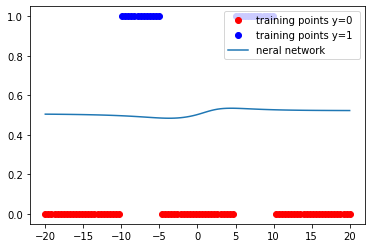

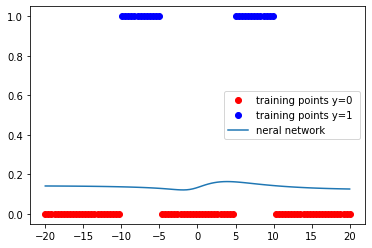

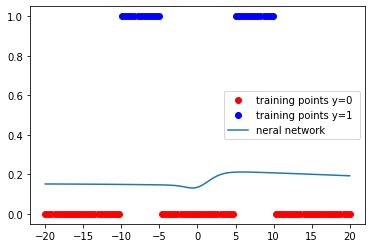

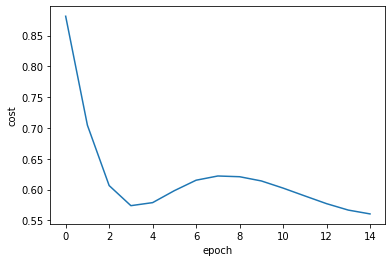

In [29]:
data_set = Data()
data_set[0]
model = Net(1,9,1)
learning_rate = 0.1
# optimizer = torch.nn.SGD(model.parameters(),lr=learning_rate)
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)
criterion = nn.BCELoss()
train_loader = DataLoader(dataset=data_set,batch_size=100)
trained_model = train(data_set,model,criterion,train_loader,optimizer)

In [ ]:
model1= torch.nn.Sequential(
    torch.nn.Linear(1, 6), 
    torch.nn.Sigmoid(),
    torch.nn.Linear(6,1),
    torch.nn.Sigmoid()

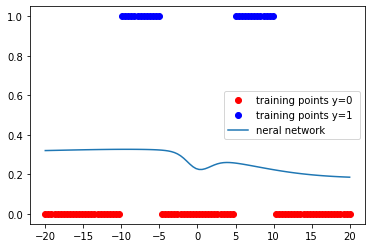

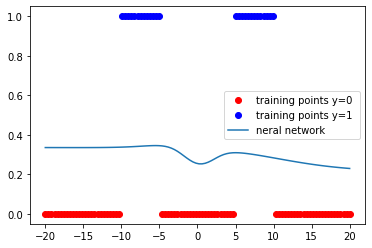

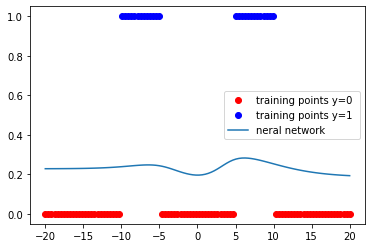

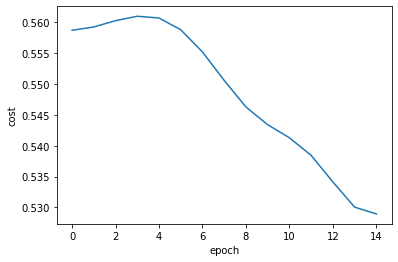

In [30]:
trained_model1 = train(data_set,model,criterion,train_loader,optimizer)
